In [1]:
import pandas as pd
import mplfinance as mpf
import numpy as np

In [2]:
def signalVisualization(df_vis, df_pump_dump):
    
    df_vis_index_string = df_vis.index.astype("string")
    signal   = []
    
    for i in range(len(df_vis)):
        if df_vis_index_string[i] in df_pump_dump.Event_Time.astype("string").tolist():
            signal.append(data_vis.low[i])
        else:signal.append(np.nan)

    return signal

In [3]:
path = !pwd
path = path[0]

In [4]:
"""
    incelenmek istenile coin adı usdt ile yazılır
    data_historical klasöründe back test için kullanılan veri
    output_pump_dump ve output_buy_sell klasörlerinde bulunan back test ile elde edilen sonuçlar yazdırılır.
"""

coin_name = "EPXUSDT"

file_name_hist = "20230614_130234_EPXUSDT_1s"
file_name_pump = "20230614_135903"
file_name_buy = "20230614_135903"

data_ = pd.read_pickle(path + "/data_historical/" + file_name_hist)
data_pump_dump = pd.read_pickle(path + "/output_pump_dump/"+file_name_pump) 
data_buy_sell = pd.read_pickle(path + "/output_buy_sell/"+file_name_buy)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ahmetkasimerbay/Desktop/DATATAI/binancePump-master5/data_historical/20230614_130234_EPXUSDT_1s'

In [5]:
# Historical data
data_vis = data_.loc[:, ["event_time", "open", "high", "low", "close", "volume"]]
# Tarih sütununu dizin olarak ayarlayın
data_vis.set_index('event_time', inplace=True)
# Tarih sütununu datetime formatına dönüştürün
data_vis.index = pd.to_datetime(data_vis.index)

In [6]:
# back test result pump dump
data_pump_dump = data_pump_dump[data_pump_dump.Symbol == coin_name]
signal_pump = signalVisualization(data_vis, data_pump_dump[data_pump_dump.color == "green"])
signal_dump = signalVisualization(data_vis, data_pump_dump[data_pump_dump.color == "red"])

ap_pump = mpf.make_addplot(signal_pump,type='scatter',markersize=100,marker='o', color = "green", alpha = 0.5)
ap_dump = mpf.make_addplot(signal_dump,type='scatter',markersize=100,marker='o', color = "red", alpha = 0.5)

In [7]:
# back test result buy sell
data_buy_sell = data_buy_sell[data_buy_sell.Symbol == coin_name]
signal_buy = signalVisualization(data_vis, data_buy_sell[data_buy_sell.order_type == "long"])
signal_sell = signalVisualization(data_vis, data_buy_sell[data_buy_sell.order_type == "short"])

ap_buy = mpf.make_addplot(signal_buy,type='scatter',markersize=200,marker='^', color = "green")
ap_sell = mpf.make_addplot(signal_sell,type='scatter',markersize=200,marker='v', color = "red")

list_ap = [ap_pump, ap_dump, ap_buy, ap_sell]
list_signal = [signal_pump, signal_dump, signal_buy, signal_sell]

In [8]:
ap = []
for i in range(len(list_signal)):
    if len(list_signal[i]) != list_signal[i].count(np.nan):
        ap.append(list_ap[i])

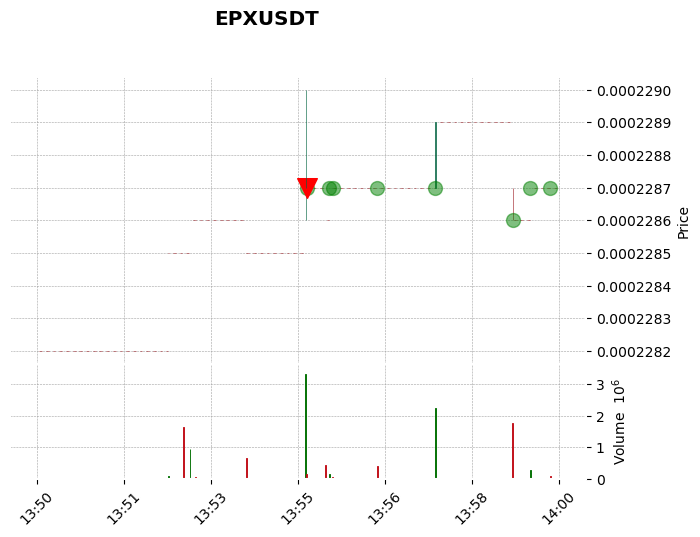

In [9]:
mpf.plot(data_vis, type='candle', style='charles', volume=True, warn_too_much_data=100000, addplot=ap, title = coin_name)